In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMG_WIDTH=224
IMG_HEIGHT=224
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
train_path = 'D:\Degree\BrainTumor_Impl\datasets\dataset1_cropped\Training'
valid_path = 'D:\Degree\BrainTumor_Impl\datasets\dataset1_cropped\Testing'

In [5]:
import os
print(os.listdir(train_path));
print(os.listdir(valid_path));

['Glioma', 'Meningioma', 'No Tumor', 'Pituitory']
['Glioma', 'Meningioma', 'No Tumor', 'Pituitory']


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                    horizontal_flip=True, 
                                   fill_mode='nearest')

In [7]:
val_datagen = ImageDataGenerator(rescale=1./255)

# **Basic ResNet-50  Model**

In [8]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

In [9]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [10]:
  # useful for getting number of classes
folders = glob('D:\Degree\BrainTumor_Impl\datasets\dataset1_cropped\Training\*')

In [11]:
folders

['D:\\Degree\\BrainTumor_Impl\\datasets\\dataset1_cropped\\Training\\Glioma',
 'D:\\Degree\\BrainTumor_Impl\\datasets\\dataset1_cropped\\Training\\Meningioma',
 'D:\\Degree\\BrainTumor_Impl\\datasets\\dataset1_cropped\\Training\\No Tumor',
 'D:\\Degree\\BrainTumor_Impl\\datasets\\dataset1_cropped\\Training\\Pituitory']

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

In [14]:
prediction

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense')>

In [15]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [17]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

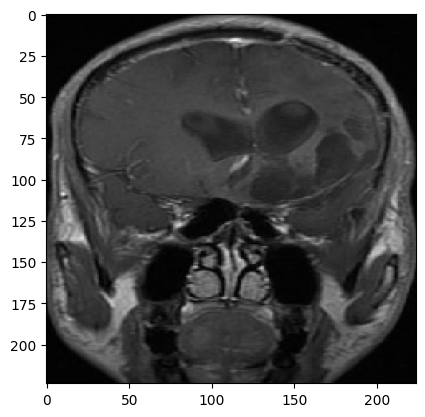

In [18]:
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

image=load_img('D:\\Degree\\BrainTumor_Impl\\datasets\\dataset1_cropped\\Training\\Glioma\\793.jpg',target_size=(224,224))


imshow(image)

In [19]:
training_set = train_datagen.flow_from_directory('D:\Degree\BrainTumor_Impl\datasets\dataset1_cropped\Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2870 images belonging to 4 classes.


In [20]:
test_set = val_datagen.flow_from_directory('D:\Degree\BrainTumor_Impl\datasets\dataset1_cropped\Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 394 images belonging to 4 classes.


In [21]:

# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
90/90 [==============================] - 276s 3s/step - loss: 3.3282 - accuracy: 0.3296 - val_loss: 4.2916 - val_accuracy: 0.2437
Epoch 2/50
90/90 [==============================] - 268s 3s/step - loss: 1.4084 - accuracy: 0.4042 - val_loss: 4.7485 - val_accuracy: 0.2563
Epoch 3/50
90/90 [==============================] - 266s 3s/step - loss: 1.5070 - accuracy: 0.4098 - val_loss: 3.8865 - val_accuracy: 0.2919
Epoch 4/50
90/90 [==============================] - 267s 3s/step - loss: 1.6404 - accuracy: 0.3923 - val_loss: 3.5384 - val_accuracy: 0.3147
Epoch 5/50
90/90 [==============================] - 266s 3s/step - loss: 1.6216 - accuracy: 0.3976 - val_loss: 3.7954 - val_accuracy: 0.3934
Epoch 6/50
90/90 [==============================] - 267s 3s/step - loss: 1.4307 - accuracy: 0.4272 - val_loss: 4.2140 - val_accuracy: 0.2970
Epoch 7/50
90/90 [==============================] - 266s 3s/step - loss: 1.4905 - accuracy: 0.4209 - val_loss: 3.4738 - val_accuracy: 0.3959
Epoch 8/50
90

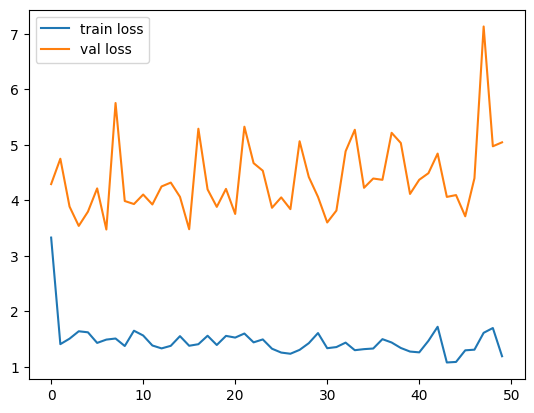

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

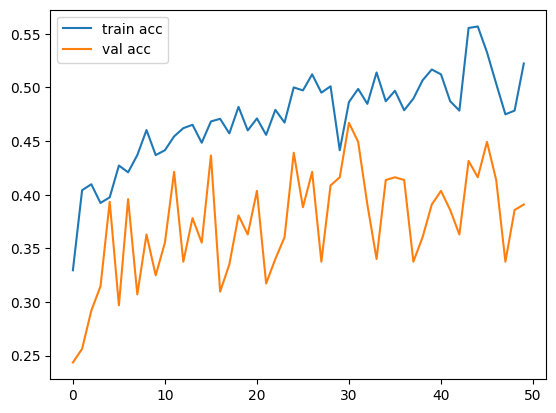

<Figure size 640x480 with 0 Axes>

In [23]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [25]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.5222996473312378\nValidation Accuracy: 0.39086294174194336')

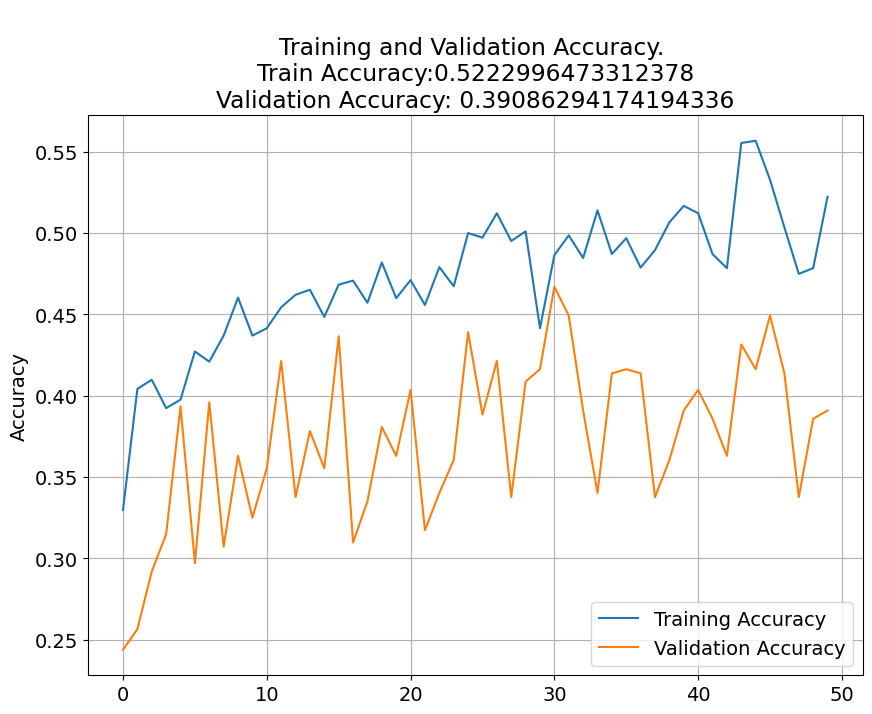

In [26]:
# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

In [27]:
import tensorflow as tf

from keras.models import load_model

model.save('ResNet50_brain_tumor_classification_try1.h5')